In [1]:
import scipy
import matplotlib.pyplot as plt
import numpy as np
import lmfit
from lmfit.models import LinearModel, LorentzianModel

In [2]:
def voigt1(x,s1,g1,o1,scale1):
    return scale1*scipy.special.voigt_profile(x-o1,s1,g1)#+a*x**2+b
def voigt2(x,s1,s2,g1,g2,o1,o2,scale1,scale2):
    return scale1*scipy.special.voigt_profile(x-o1,s1,g1)+scale2*scipy.special.voigt_profile(x-o2,s2,g2)#+a*x**2+b

In [3]:
path =  'Data/SI_111_30_15.xy'
with open(path) as tf:
    data = np.loadtxt(tf,delimiter=" ").T

err = np.zeros(len(data[1]))
for i in range(len(err)):
    err[i] = (data[1,i])**0.5
data = np.vstack([data,err])

zu betrachtende intervalle:  
b1[25,26]->[667,733]  
a1[28,29]->[867,933]  
b2[52.4,53]->[2493,2533]  
a2[58.5,59.25]->[2900,2950]  
b3[83,84]->[4533,4600]  
a3[93,97]->[5200,5467]  

In [4]:
for i in range(len(data[0])):
    if data[0,i]>=97:
        print(i)

5467
5468
5469
5470
5471
5472
5473
5474
5475
5476
5477
5478
5479
5480
5481
5482
5483
5484
5485
5486
5487
5488
5489
5490
5491
5492
5493
5494
5495
5496
5497
5498
5499
5500
5501
5502
5503
5504
5505
5506
5507
5508
5509
5510
5511
5512
5513
5514
5515
5516
5517
5518
5519
5520
5521
5522
5523
5524
5525
5526
5527
5528
5529
5530
5531
5532
5533
5534
5535
5536
5537
5538
5539
5540
5541
5542
5543
5544
5545
5546
5547
5548
5549
5550
5551
5552
5553
5554
5555
5556
5557
5558
5559
5560
5561
5562
5563
5564
5565
5566
5567
5568
5569
5570
5571
5572
5573
5574
5575
5576
5577
5578
5579
5580
5581
5582
5583
5584
5585
5586
5587
5588
5589
5590
5591
5592
5593
5594
5595
5596
5597
5598
5599
5600
5601
5602
5603
5604
5605
5606
5607
5608
5609
5610
5611
5612
5613
5614
5615
5616
5617
5618
5619
5620
5621
5622
5623
5624
5625
5626
5627
5628
5629
5630
5631
5632
5633
5634
5635
5636
5637
5638
5639
5640
5641
5642
5643
5644
5645
5646
5647
5648
5649
5650
5651
5652
5653
5654
5655
5656
5657
5658
5659
5660
5661
5662
5663
5664
5665
5666


In [5]:
#modell erstellen b1[25,26]->[667,733] 
model_voigt = lmfit.model.Model(voigt1)  

#parameter erstellen
pars_voigt = model_voigt.make_params()

#Parameter Optimieren
pars_voigt["s1"].set(value=0.0137,min=0,max=1)
pars_voigt["g1"].set(value=0.0137,min=0,max=1)
#pars_voigt["a"].set(0.1)
#pars_voigt["b"].set(20)
pars_voigt["o1"].set(value=25.6,min=25.5,max=25.75)
pars_voigt["scale1"].set(7000)

#Fitten
out_voigt = model_voigt.fit(data[1,667:733],x=data[0,667:733],params=pars_voigt,weights=1/data[2,667:733],nan_policy='propagate')
b1f=out_voigt.fit_report()
b1p=np.array([np.arange(25,26,0.001),out_voigt.eval(x=np.arange(25,26,0.001))])

In [6]:
#modell erstellen a1[28,29]->[867,933]  
model_voigt = lmfit.model.Model(voigt2)  

#parameter erstellen
pars_voigt = model_voigt.make_params()

#Parameter Optimieren
pars_voigt["s1"].set(value=0.0137,min=0,max=1)
pars_voigt["g1"].set(value=0.0137,min=0,max=1)
pars_voigt["s2"].set(value=0.0147,min=0,max=1)
pars_voigt["g2"].set(value=0.0147,min=0,max=1)
#pars_voigt["a"].set(0.1)
#pars_voigt["b"].set(20)
pars_voigt["o1"].set(value=28.4,min=28,max=29)
pars_voigt["o2"].set(value=28.5,min=28,max=29)
pars_voigt["scale1"].set(25000)
pars_voigt["scale2"].set(15000)
 
#Fitten
out_voigt = model_voigt.fit(data[1,867:933],x=data[0,867:933],params=pars_voigt,weights=1/data[2,867:933],nan_policy='propagate')
a1f=out_voigt.fit_report()
a1p=np.array([np.arange(28,29,0.001),out_voigt.eval(x=np.arange(28,29,0.001))])

In [7]:
#modell erstellen b2[52.4,53]->[2493,2533] 
model_voigt = lmfit.model.Model(voigt1)  

#parameter erstellen
pars_voigt = model_voigt.make_params()

#Parameter Optimieren
pars_voigt["s1"].set(value=0.0137,min=0,max=1)
pars_voigt["g1"].set(value=0.0137,min=0,max=1)
#pars_voigt["a"].set(0.1)
#pars_voigt["b"].set(20)
pars_voigt["o1"].set(value=52.67,min=52.4,max=53)
pars_voigt["scale1"].set(100)

#Fitten
out_voigt = model_voigt.fit(data[1,2493:2533],x=data[0,2493:2533],params=pars_voigt,weights=1/data[2,2493:2533],nan_policy='propagate')
b2f=out_voigt.fit_report()
b2p=np.array([np.arange(52.4,53,0.001),out_voigt.eval(x=np.arange(52.4,53,0.001))])

In [8]:
#modell erstellen a2[58.5,59.25]->[2900,2950]2900:2950
model_voigt = lmfit.model.Model(voigt2)  

#parameter erstellen
pars_voigt = model_voigt.make_params()

#Parameter Optimieren
pars_voigt["s1"].set(value=0.0137,min=0,max=1)
pars_voigt["g1"].set(value=0.0137,min=0,max=1)
pars_voigt["s2"].set(value=0.0147,min=0,max=1)
pars_voigt["g2"].set(value=0.0147,min=0,max=1)
#pars_voigt["a"].set(0.1)
#pars_voigt["b"].set(20)
pars_voigt["o1"].set(value=58.6,min=58.5,max=59.25)
pars_voigt["o2"].set(value=59,min=58.5,max=59.25)
pars_voigt["scale1"].set(25000)
pars_voigt["scale2"].set(15000)
 
#Fitten
out_voigt = model_voigt.fit(data[1,2900:2950],x=data[0,2900:2950],params=pars_voigt,weights=1/data[2,2900:2950],nan_policy='propagate')
a2f=out_voigt.fit_report()
a2p=np.array([np.arange(58.5,59.25,0.001),out_voigt.eval(x=np.arange(58.5,59.25,0.001))])

In [9]:
#modell erstellen b3[83,84]->[4533,4600]
model_voigt = lmfit.model.Model(voigt1)  

#parameter erstellen
pars_voigt = model_voigt.make_params()

#Parameter Optimieren
pars_voigt["s1"].set(value=0.0137,min=0,max=1)
pars_voigt["g1"].set(value=0.0137,min=0,max=1)
#pars_voigt["a"].set(0.1)
#pars_voigt["b"].set(20)
pars_voigt["o1"].set(value=83.5,min=83,max=84)
pars_voigt["scale1"].set(100)

#Fitten
out_voigt = model_voigt.fit(data[1,4533:4600],x=data[0,4533:4600],params=pars_voigt,weights=1/data[2,4533:4600],nan_policy='propagate')
b3f=out_voigt.fit_report()
b3p=np.array([np.arange(83,84,0.001),out_voigt.eval(x=np.arange(83,84,0.001))])

In [10]:
#modell erstellen a3[93,97]->[5200,5467]  
model_voigt = lmfit.model.Model(voigt2)  

#parameter erstellen
pars_voigt = model_voigt.make_params()

#Parameter Optimieren
pars_voigt["s1"].set(value=0.0137,min=0,max=1)
pars_voigt["g1"].set(value=0.0137,min=0,max=1)
pars_voigt["s2"].set(value=0.0147,min=0,max=1)
pars_voigt["g2"].set(value=0.0147,min=0,max=1)
#pars_voigt["a"].set(0.1)
#pars_voigt["b"].set(20)
pars_voigt["o1"].set(value=94.9,min=93,max=97)
pars_voigt["o2"].set(value=95.3,min=93,max=97)
pars_voigt["scale1"].set(25000)
pars_voigt["scale2"].set(15000)
 
#Fitten
out_voigt = model_voigt.fit(data[1,5200:5467],x=data[0,5200:5467],params=pars_voigt,weights=1/data[2,5200:5467],nan_policy='propagate')
a3f=out_voigt.fit_report()
a3p=np.array([np.arange(94,96,0.001),out_voigt.eval(x=np.arange(94,96,0.001))])

(15.0, 100.0)

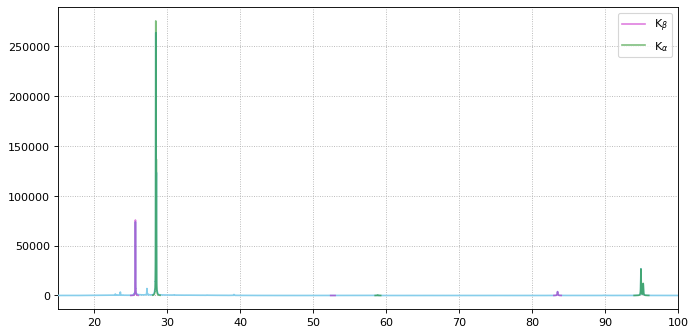

In [23]:
fig = plt.figure(figsize=(10,5),dpi=80,linewidth=50)
plt.errorbar(data[0],data[1],yerr=data[2],zorder=5,mfc='black',c='skyblue')
plt.plot(b1p[0],b1p[1],zorder=10,label='K'r'$_\beta$',color='m',alpha=0.5)
plt.plot(a1p[0],a1p[1],zorder=10,label='K'r'$_\alpha$',color='g',alpha=0.5)
plt.plot(b2p[0],b2p[1],zorder=10,color='m',alpha=0.5)
plt.plot(a2p[0],a2p[1],zorder=10,color='g',alpha=0.5)
plt.plot(b3p[0],b3p[1],zorder=10,color='m',alpha=0.5)
plt.plot(a3p[0],a3p[1],zorder=10,color='g',alpha=0.5)



plt.legend()
plt.grid(axis='both',linestyle=':')
plt.xlim(15,100)